In [720]:
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from warnings import filterwarnings
filterwarnings(action='ignore')

In [721]:
redwine=pd.read_csv('winequality-red.csv')

In [722]:
redwine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [723]:
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [724]:
redwine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [725]:
redwine.keys()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [726]:
redwine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [727]:
redwine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [728]:
redwine.mean()

fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64

In [729]:
redwine.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [730]:
redwine.shape

(1599, 12)

In [731]:
# removing outliers
z=np.abs(zscore(redwine))
z

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246,0.787823
1,0.298547,1.967442,1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,0.719933,0.128950,0.584777,0.787823
2,0.298547,1.297065,1.186070,0.169427,0.096353,0.083669,0.229047,0.134264,0.331177,0.048089,0.584777,0.787823
3,1.654856,1.384443,1.484154,0.453218,0.264960,0.107592,0.411500,0.664277,0.979104,0.461180,0.584777,0.450848
4,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246,0.787823
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1.217796,0.403229,0.980669,0.382271,0.053845,1.542054,0.075043,0.978765,0.899886,0.461180,0.072294,0.787823
1595,1.390155,0.123905,0.877968,0.240375,0.541259,2.211469,0.137820,0.862162,1.353436,0.601055,0.729364,0.450848
1596,1.160343,0.099554,0.723916,0.169427,0.243707,1.255161,0.196679,0.533554,0.705508,0.542042,0.541630,0.450848
1597,1.390155,0.654620,0.775267,0.382271,0.264960,1.542054,0.075043,0.676657,1.677400,0.305990,0.209308,0.787823


In [732]:
threshold=3
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

In [825]:
redwine_new=redwine[(z<3).all(axis=1)]

In [827]:
redwine.shape

(1599, 12)

In [828]:
redwine_new.shape

(1451, 12)

In [829]:
redwine=redwine_new
redwine.shape

(1451, 12)

In [830]:
redwine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [831]:
X=redwine.drop(['quality'],axis=1)

In [832]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [833]:
y=redwine['quality']

In [834]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1451, dtype: int64

In [835]:
Y=redwine['quality'].apply(lambda y:1 if y>=7 else 0)

In [836]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1451, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

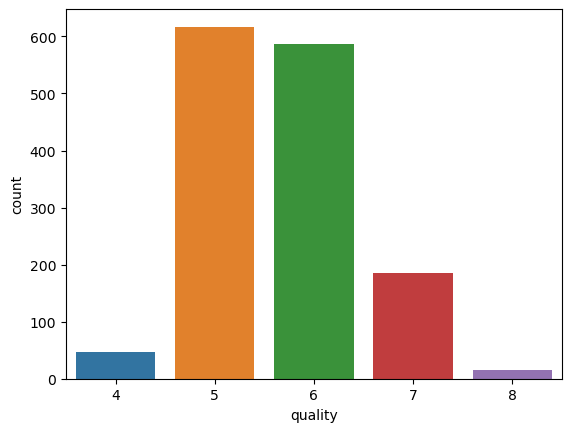

In [837]:
sns.countplot(x ='quality', data = redwine)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

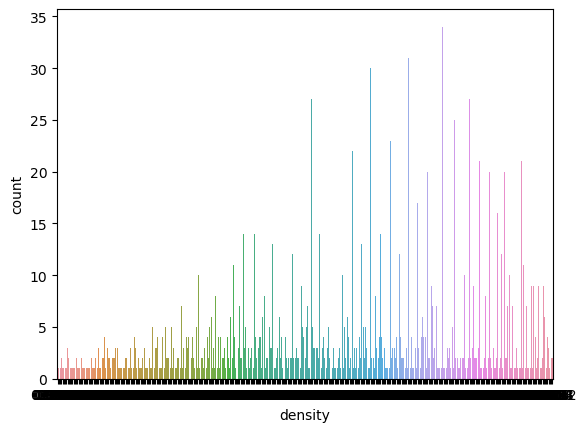

In [838]:
sns.countplot(x ='density', data = redwine)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

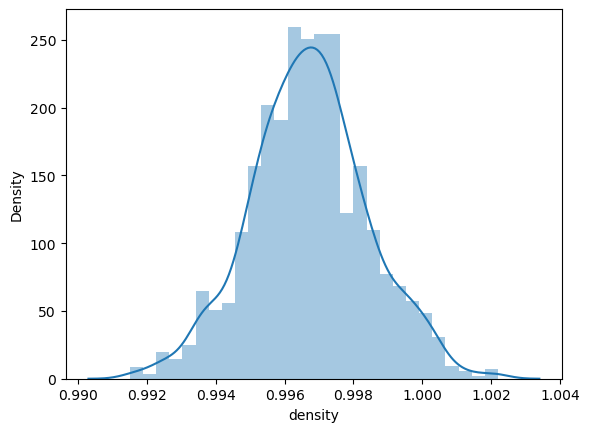

In [839]:
sns.distplot(redwine['density'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

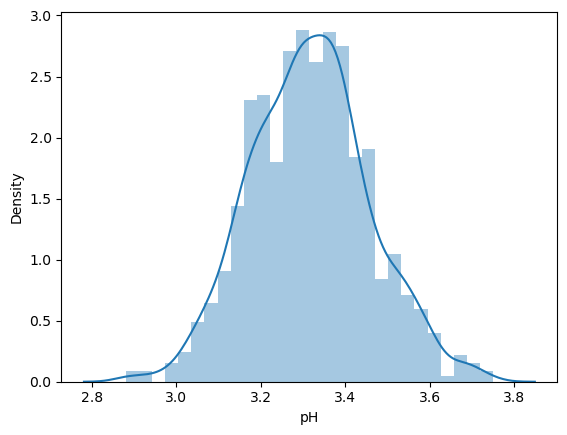

In [840]:
sns.distplot(redwine['pH'])
plt.show

<Axes: xlabel='quality', ylabel='citric acid'>

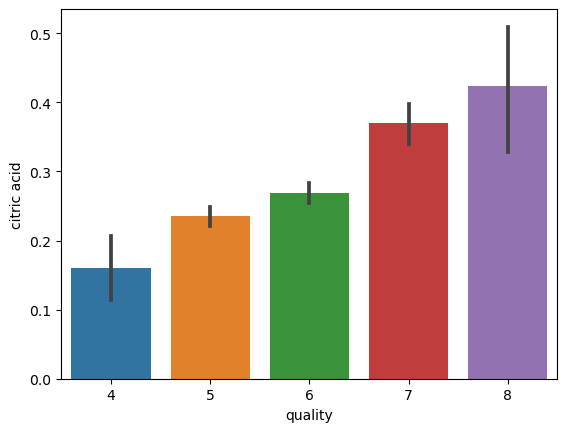

In [841]:

sns.barplot(x='quality',y='citric acid',data=redwine)

<Axes: xlabel='quality', ylabel='residual sugar'>

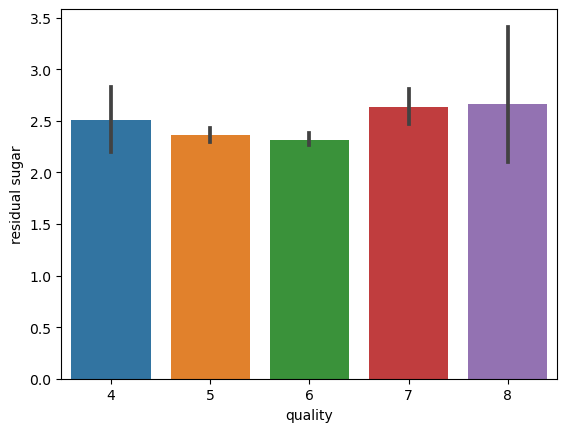

In [842]:

sns.barplot(x='quality',y='residual sugar',data=redwine)


<Axes: xlabel='quality', ylabel='residual sugar'>

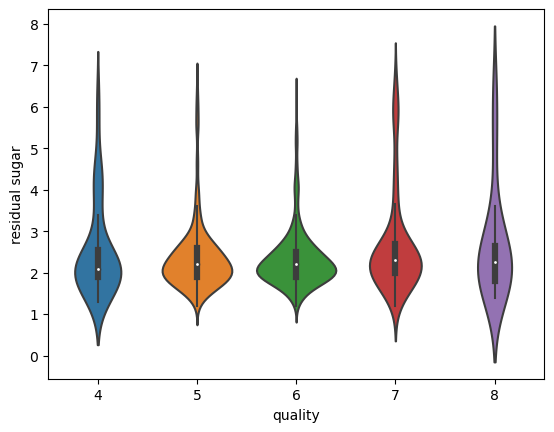

In [843]:
sns.violinplot(x='quality',y='residual sugar',data=redwine)


<Axes: xlabel='quality', ylabel='pH'>

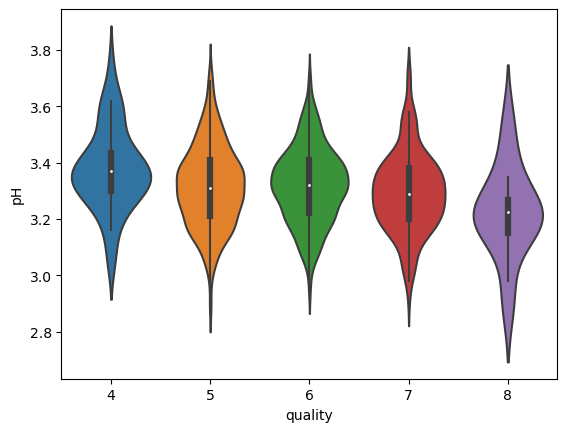

In [844]:
sns.violinplot(x='quality',y='pH',data=redwine)

<Axes: >

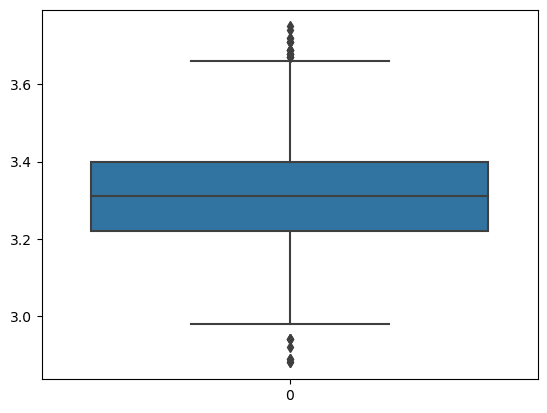

In [845]:
sns.boxplot(redwine['pH'])


fixed acidity              Axes(0.125,0.747241;0.133621x0.132759)
volatile acidity        Axes(0.285345,0.747241;0.133621x0.132759)
citric acid              Axes(0.44569,0.747241;0.133621x0.132759)
residual sugar          Axes(0.606034,0.747241;0.133621x0.132759)
chlorides               Axes(0.766379,0.747241;0.133621x0.132759)
free sulfur dioxide        Axes(0.125,0.587931;0.133621x0.132759)
total sulfur dioxide    Axes(0.285345,0.587931;0.133621x0.132759)
density                  Axes(0.44569,0.587931;0.133621x0.132759)
pH                      Axes(0.606034,0.587931;0.133621x0.132759)
sulphates               Axes(0.766379,0.587931;0.133621x0.132759)
alcohol                    Axes(0.125,0.428621;0.133621x0.132759)
quality                 Axes(0.285345,0.428621;0.133621x0.132759)
dtype: object

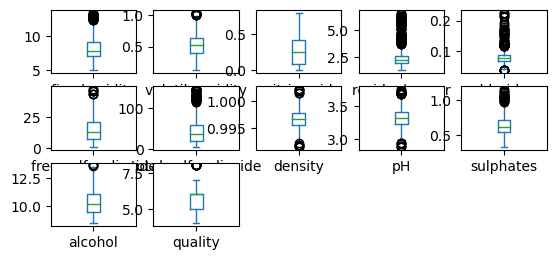

In [846]:
redwine.plot(kind='box',subplots=True,layout=(5,5))

<Axes: xlabel='pH', ylabel='Count'>

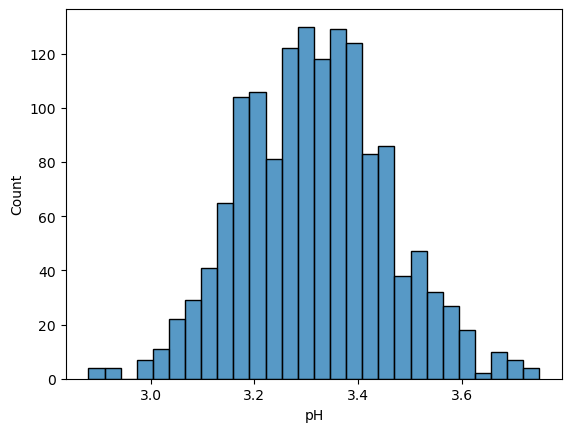

In [847]:
sns.histplot(redwine['pH'])

<Axes: xlabel='chlorides', ylabel='Count'>

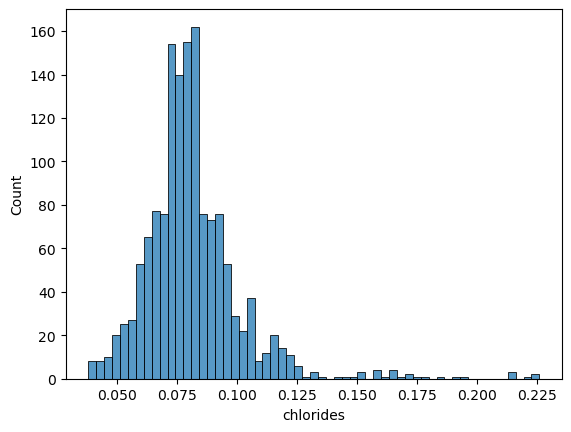

In [848]:
sns.histplot(redwine['chlorides'])

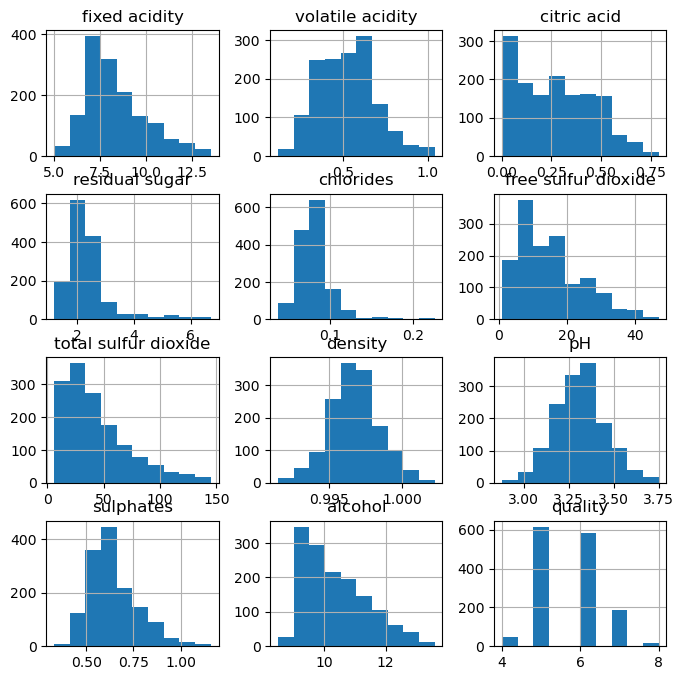

In [849]:
redwine.hist(figsize=(8,8),bins=10)
plt.show()

<Figure size 800x700 with 0 Axes>

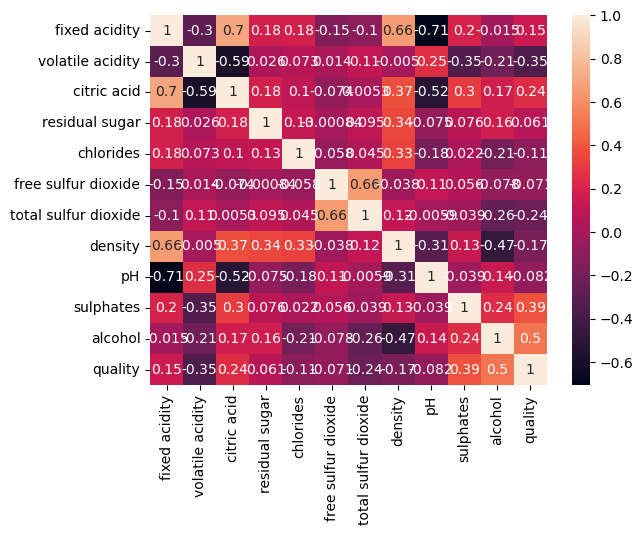

<Figure size 800x700 with 0 Axes>

In [850]:
corr_hmap = redwine.corr()
sns.heatmap(corr_hmap,annot=True)
plt.figure(figsize=(8,7))

In [851]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=11)

In [852]:
X_train.shape

(1015, 11)

In [853]:
X_test.shape

(436, 11)

In [854]:
Y_train.shape

(1015,)

In [855]:
Y_test.shape

(436,)

In [856]:
#logistic regression
lg=LogisticRegression()

In [857]:
#training the model
lg.fit(X_train,Y_train)

LogisticRegression()

In [858]:
#testing the model
pred=lg.predict(X_test)

In [859]:
pred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,

In [860]:
accuracy_score(Y_test,pred)

0.8922018348623854

In [861]:
print(confusion_matrix(Y_test,pred))

[[374   8]
 [ 39  15]]


<Axes: >

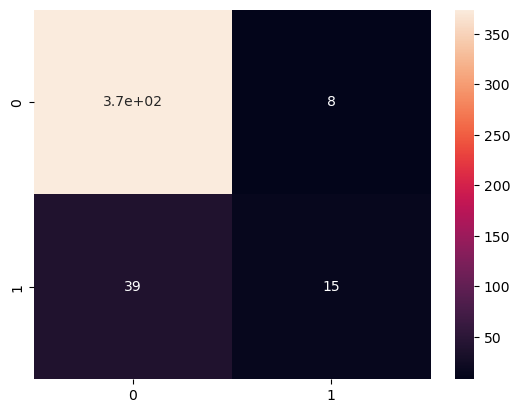

In [862]:
c=confusion_matrix(Y_test,pred)
sns.heatmap(c,annot=True)

In [863]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       382
           1       0.65      0.28      0.39        54

    accuracy                           0.89       436
   macro avg       0.78      0.63      0.67       436
weighted avg       0.87      0.89      0.87       436



In [864]:
#lets do one test
def qualitypred(p):
    p=p.reshape(1,-1)
    pred=lg.predict(p)
    print('predicted value:',pred)
    if pred==1:
        print('The wine quality is good')
    else:
        print('the wine quality is bad')

In [865]:
p=np.array([6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0])
qualitypred(p)

predicted value: [0]
the wine quality is bad


In [866]:
mnb=MultinomialNB()

In [867]:
mnb.fit(X_train,Y_train)

MultinomialNB()

In [868]:
predmnb=mnb.predict(X_test)

In [869]:
predmnb

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,

In [870]:
accuracy_score(Y_test,predmnb)

0.6788990825688074

In [871]:
print(confusion_matrix(Y_test,predmnb))

[[265 117]
 [ 23  31]]


In [872]:
print(classification_report(Y_test,predmnb))

              precision    recall  f1-score   support

           0       0.92      0.69      0.79       382
           1       0.21      0.57      0.31        54

    accuracy                           0.68       436
   macro avg       0.56      0.63      0.55       436
weighted avg       0.83      0.68      0.73       436



In [873]:
gb=GaussianNB()

In [874]:
gb.fit(X_train,Y_train)

GaussianNB()

In [875]:
predgb=gb.predict(X_test)

In [876]:
predgb

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,

In [877]:
accuracy_score(Y_test,predgb)

0.8784403669724771

In [878]:
knn=KNeighborsClassifier()

In [879]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [880]:
predknn=knn.predict(X_test)

In [881]:
predknn

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,

In [882]:
accuracy_score(Y_test,predknn)

0.8807339449541285

In [883]:
print(confusion_matrix(Y_test,predknn))

[[372  10]
 [ 42  12]]


In [884]:
print(classification_report(Y_test,predknn))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       382
           1       0.55      0.22      0.32        54

    accuracy                           0.88       436
   macro avg       0.72      0.60      0.63       436
weighted avg       0.85      0.88      0.86       436



In [885]:
svc=SVC()

In [886]:
svc.fit(X_train,Y_train)

SVC()

In [887]:
predsvc=svc.predict(X_test)

In [888]:
predsvc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [889]:
accuracy_score(Y_test,predsvc)

0.8761467889908257

In [890]:
print(confusion_matrix(Y_test,predsvc))

[[382   0]
 [ 54   0]]


In [891]:
print(classification_report(Y_test,predsvc))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       382
           1       0.00      0.00      0.00        54

    accuracy                           0.88       436
   macro avg       0.44      0.50      0.47       436
weighted avg       0.77      0.88      0.82       436



In [892]:
dtc=DecisionTreeClassifier()

In [893]:
dtc.fit(X_train,Y_train)

DecisionTreeClassifier()

In [894]:
preddtc=dtc.predict(X_test)

In [895]:
preddtc

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,

In [896]:
accuracy_score(Y_test,preddtc)

0.8394495412844036

In [897]:
print(confusion_matrix(Y_test,preddtc))

[[345  37]
 [ 33  21]]


In [898]:
print(classification_report(Y_test,preddtc))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       382
           1       0.36      0.39      0.38        54

    accuracy                           0.84       436
   macro avg       0.64      0.65      0.64       436
weighted avg       0.84      0.84      0.84       436



In [899]:
rfc=RandomForestClassifier()

In [900]:
rfc.fit(X_train,Y_train)

RandomForestClassifier()

In [901]:
predrfc=rfc.predict(X_test)

In [902]:
predrfc

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,

In [903]:
accuracy_score(Y_test,predrfc)

0.9288990825688074

In [904]:
print(confusion_matrix(Y_test,predrfc))

[[377   5]
 [ 26  28]]


In [905]:
print(classification_report(Y_test,predrfc))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       382
           1       0.85      0.52      0.64        54

    accuracy                           0.93       436
   macro avg       0.89      0.75      0.80       436
weighted avg       0.92      0.93      0.92       436



In [906]:
Y_pred_proba=lg.predict_proba(X_test)[:,1]

In [907]:
Y_pred_proba

array([0.18501732, 0.02201752, 0.91307962, 0.60067569, 0.04464   ,
       0.01950576, 0.11803659, 0.03810971, 0.00511587, 0.5449531 ,
       0.00957105, 0.01234169, 0.03654453, 0.5541389 , 0.03855966,
       0.30756347, 0.39687796, 0.03018504, 0.6710729 , 0.03247243,
       0.02864537, 0.49449399, 0.20102148, 0.22466916, 0.24712052,
       0.17313593, 0.04484793, 0.03311974, 0.11146706, 0.12884895,
       0.02758985, 0.09688394, 0.01216525, 0.00428386, 0.05285812,
       0.04650951, 0.01631488, 0.00363133, 0.02029363, 0.0044676 ,
       0.0879172 , 0.14484088, 0.041995  , 0.0593368 , 0.02043304,
       0.30279051, 0.1687274 , 0.04362176, 0.20038688, 0.33485326,
       0.27482393, 0.01363018, 0.0196728 , 0.01234169, 0.09208045,
       0.18921569, 0.01331531, 0.17576171, 0.09058314, 0.05105388,
       0.00734416, 0.0660247 , 0.11373521, 0.04323754, 0.09251618,
       0.03774258, 0.32949176, 0.06127519, 0.06063259, 0.01018386,
       0.00680987, 0.33793188, 0.3260944 , 0.09004867, 0.21424

In [908]:
fpr,tpr,thresholds=roc_curve(Y_test,Y_pred_proba)

In [909]:
fpr

array([0.        , 0.0026178 , 0.0026178 , 0.0052356 , 0.0052356 ,
       0.0078534 , 0.0078534 , 0.0104712 , 0.0104712 , 0.01308901,
       0.01308901, 0.01832461, 0.01832461, 0.02356021, 0.02356021,
       0.02879581, 0.02879581, 0.04188482, 0.04188482, 0.04450262,
       0.04973822, 0.04973822, 0.05235602, 0.05235602, 0.05497382,
       0.05497382, 0.06020942, 0.06020942, 0.06282723, 0.06282723,
       0.06544503, 0.06544503, 0.07068063, 0.07068063, 0.08115183,
       0.08115183, 0.09424084, 0.09424084, 0.11256545, 0.11256545,
       0.12041885, 0.12041885, 0.12303665, 0.12303665, 0.12827225,
       0.12827225, 0.13089005, 0.13089005, 0.14397906, 0.14397906,
       0.15183246, 0.15183246, 0.15706806, 0.16230366, 0.16753927,
       0.17015707, 0.17015707, 0.18062827, 0.18586387, 0.19109948,
       0.19109948, 0.23298429, 0.2382199 , 0.28010471, 0.28010471,
       0.28795812, 0.28795812, 0.29581152, 0.30104712, 0.35340314,
       0.35340314, 0.35602094, 0.35602094, 0.35863874, 0.35863

In [910]:
tpr

array([0.        , 0.        , 0.03703704, 0.03703704, 0.09259259,
       0.09259259, 0.11111111, 0.11111111, 0.18518519, 0.18518519,
       0.25925926, 0.25925926, 0.27777778, 0.27777778, 0.2962963 ,
       0.2962963 , 0.35185185, 0.35185185, 0.37037037, 0.37037037,
       0.37037037, 0.38888889, 0.38888889, 0.40740741, 0.40740741,
       0.44444444, 0.44444444, 0.48148148, 0.48148148, 0.51851852,
       0.51851852, 0.57407407, 0.57407407, 0.59259259, 0.59259259,
       0.62962963, 0.62962963, 0.64814815, 0.64814815, 0.66666667,
       0.66666667, 0.7037037 , 0.7037037 , 0.72222222, 0.72222222,
       0.74074074, 0.74074074, 0.77777778, 0.77777778, 0.7962963 ,
       0.7962963 , 0.83333333, 0.83333333, 0.83333333, 0.83333333,
       0.83333333, 0.85185185, 0.85185185, 0.85185185, 0.85185185,
       0.87037037, 0.87037037, 0.87037037, 0.87037037, 0.88888889,
       0.88888889, 0.90740741, 0.90740741, 0.90740741, 0.90740741,
       0.92592593, 0.92592593, 0.94444444, 0.94444444, 0.96296

In [911]:
thresholds

array([1.91307962, 0.91307962, 0.6710729 , 0.6634888 , 0.64797631,
       0.61853439, 0.61502997, 0.60067569, 0.55402012, 0.5449531 ,
       0.50757655, 0.50665504, 0.50626615, 0.4959948 , 0.49474101,
       0.49214407, 0.45660819, 0.39928945, 0.39687796, 0.39191558,
       0.38483878, 0.38398545, 0.38007421, 0.37601279, 0.35622438,
       0.34377542, 0.33485326, 0.32949176, 0.32697956, 0.32601236,
       0.32112773, 0.312898  , 0.30756347, 0.30719881, 0.29607278,
       0.28458383, 0.2639149 , 0.26035685, 0.24271471, 0.23272277,
       0.22672641, 0.22542936, 0.22538025, 0.22466916, 0.21824461,
       0.21801307, 0.21424268, 0.20970444, 0.20038688, 0.19815793,
       0.18921569, 0.18501732, 0.18468655, 0.18192371, 0.17752245,
       0.17715026, 0.17576171, 0.16538004, 0.16220765, 0.16066004,
       0.15888035, 0.13732881, 0.13527808, 0.11263086, 0.11146706,
       0.10908501, 0.10577106, 0.10517234, 0.1024806 , 0.08152847,
       0.08141833, 0.08036177, 0.07964107, 0.07829918, 0.07813

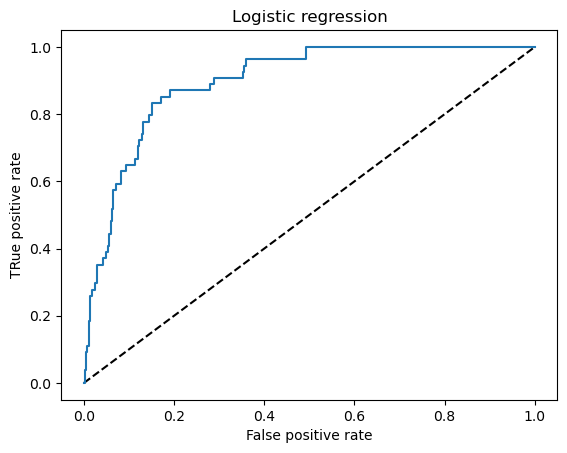

In [912]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('TRue positive rate')
plt.title('Logistic regression')
plt.show()

In [913]:
auc_score=roc_auc_score(Y_test,lg.predict(X_test))

In [914]:
print(auc_score)

0.6284176847004072


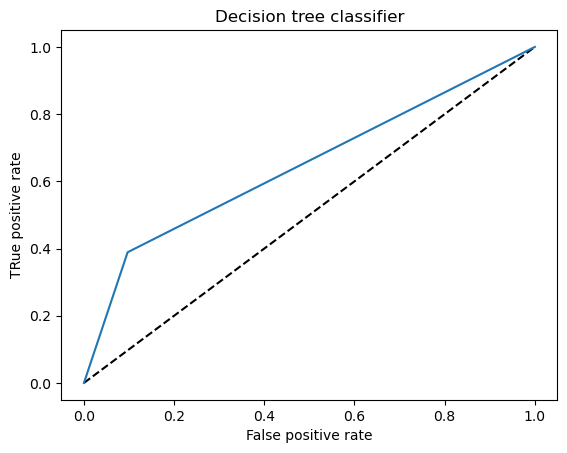

In [915]:
Y_pred_proba=dtc.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(Y_test,Y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decison tree classifier')
plt.xlabel('False positive rate')
plt.ylabel('TRue positive rate')
plt.title('Decision tree classifier')
plt.show()



In [916]:
auc_score=roc_auc_score(Y_test,dtc.predict(X_test))

In [917]:
auc_score

0.6460151250727167

In [918]:

#applying machine learning models collectively
lg=LogisticRegression()
mnb=MultinomialNB()
gb=GaussianNB()
knn=KNeighborsClassifier()
svc=SVC()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()

model=lg,mnb,gb,knn,svc,dtc,rfc

for m in model:
    
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    predm=m.predict(X_test)
    
    print('Accuracy score of ',m,' is:')
    print(accuracy_score(Y_test,predm))
    print(confusion_matrix(Y_test,predm))
    print(classification_report(Y_test,predm))
    print('\n')

Accuracy score of  LogisticRegression()  is:
0.8922018348623854
[[374   8]
 [ 39  15]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       382
           1       0.65      0.28      0.39        54

    accuracy                           0.89       436
   macro avg       0.78      0.63      0.67       436
weighted avg       0.87      0.89      0.87       436



Accuracy score of  MultinomialNB()  is:
0.6788990825688074
[[265 117]
 [ 23  31]]
              precision    recall  f1-score   support

           0       0.92      0.69      0.79       382
           1       0.21      0.57      0.31        54

    accuracy                           0.68       436
   macro avg       0.56      0.63      0.55       436
weighted avg       0.83      0.68      0.73       436



Accuracy score of  GaussianNB()  is:
0.8784403669724771
[[349  33]
 [ 20  34]]
              precision    recall  f1-score   support

           0       0.95      0.91      

In [823]:
# matching all the accuarcy score it seems the Random forest classifier is the appropriate model to be used.